/kaggle/input/2021-freecodecamp-new-coder-survey/2021 New Coder Survey.csv


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:113: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


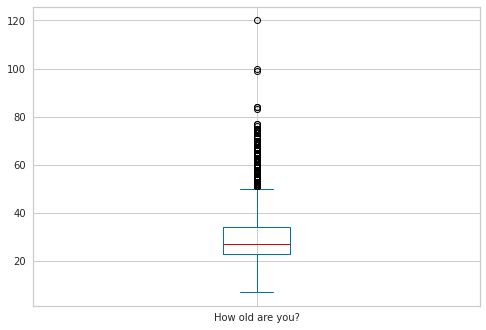

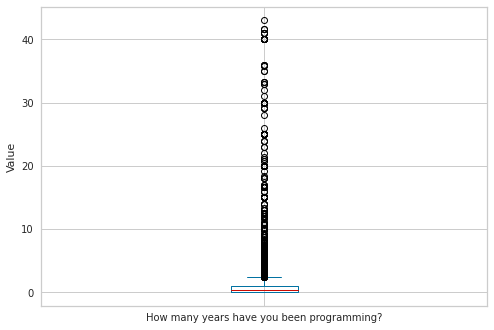

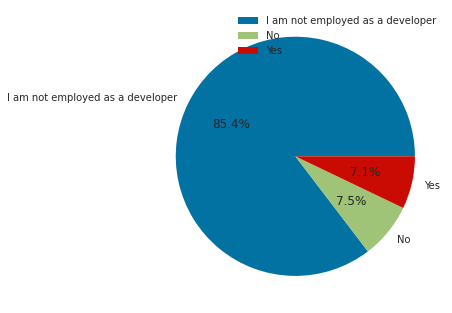

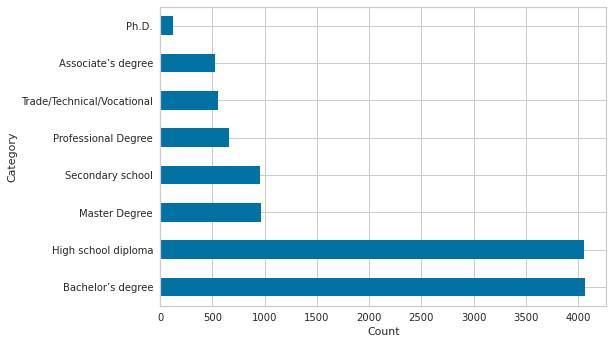

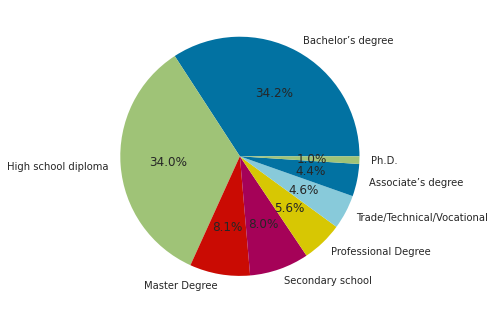

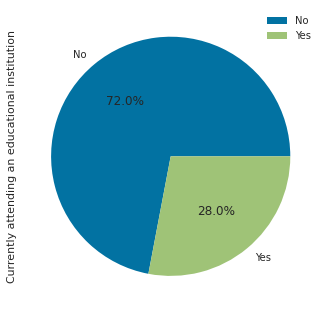

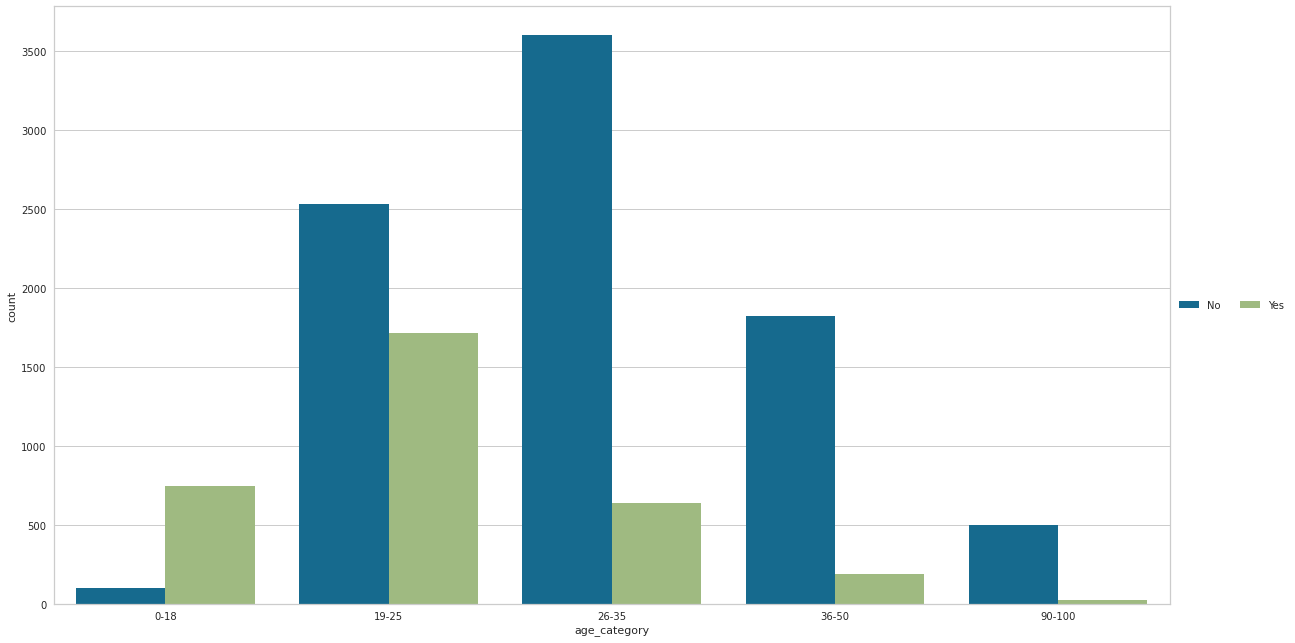

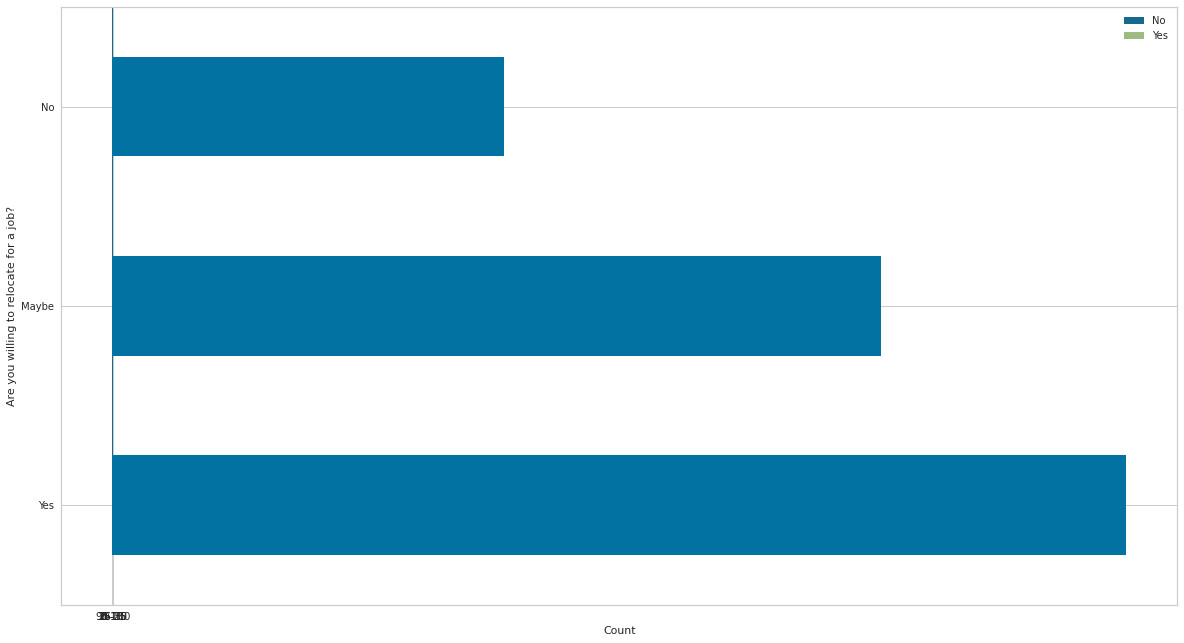

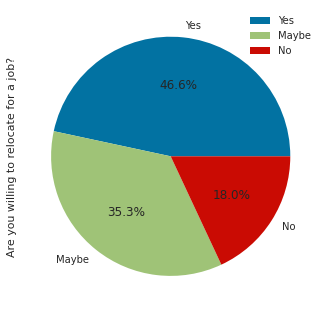

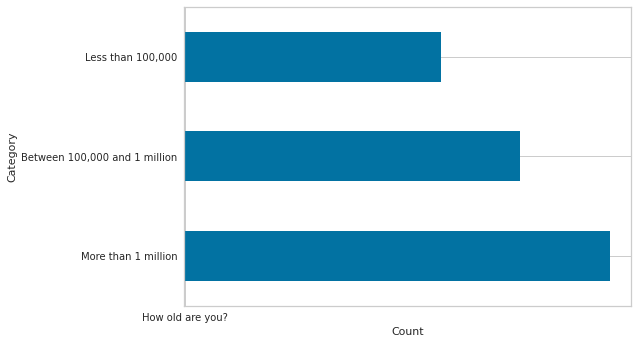

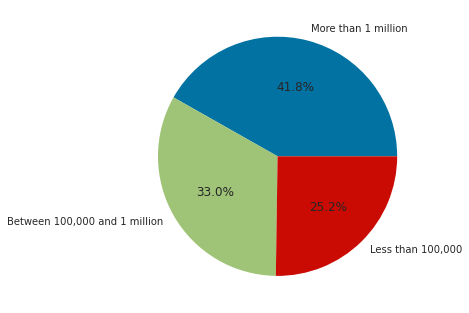

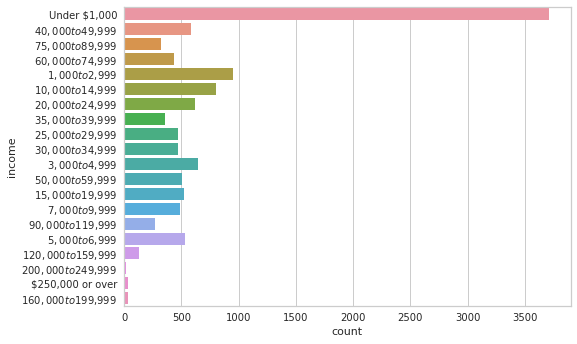

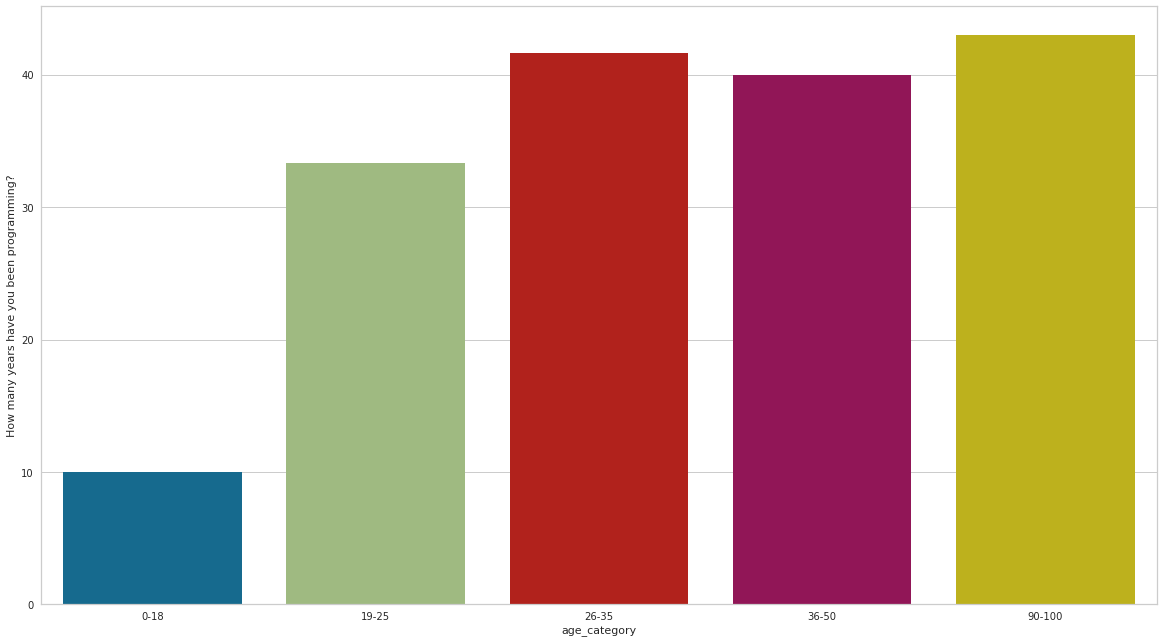

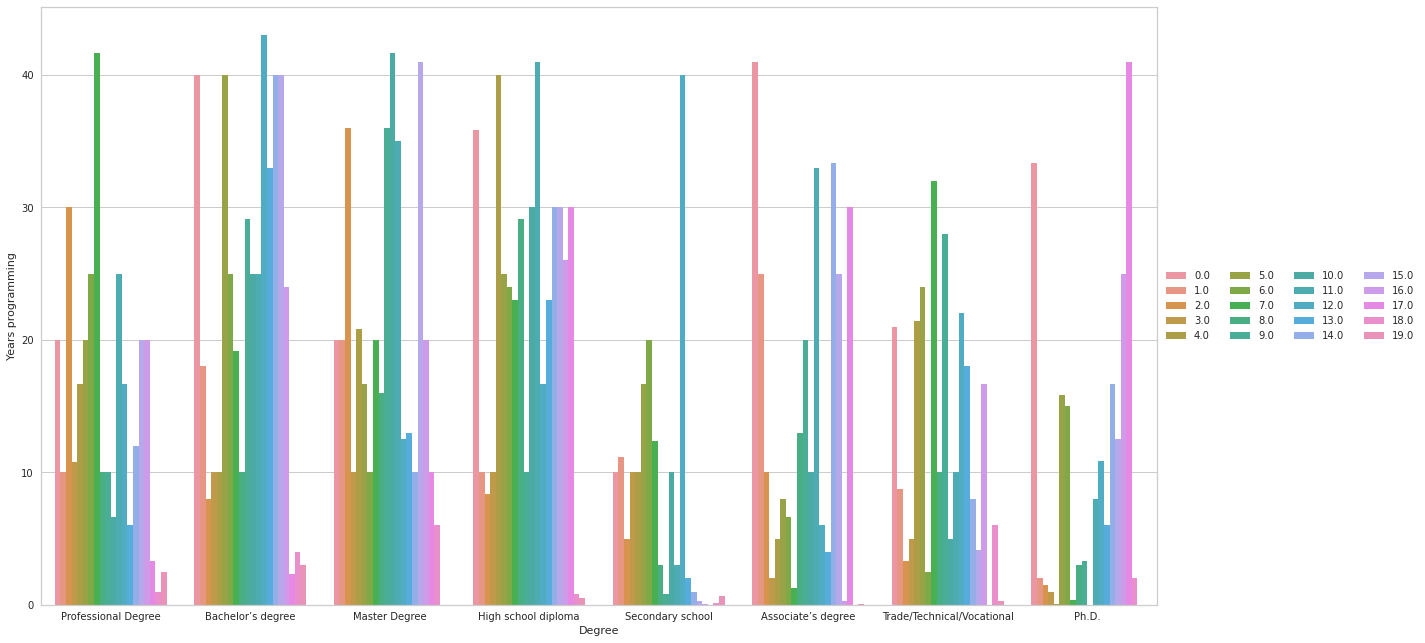

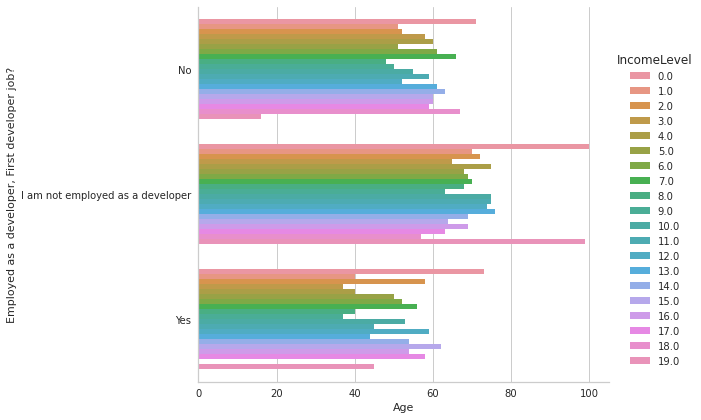

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


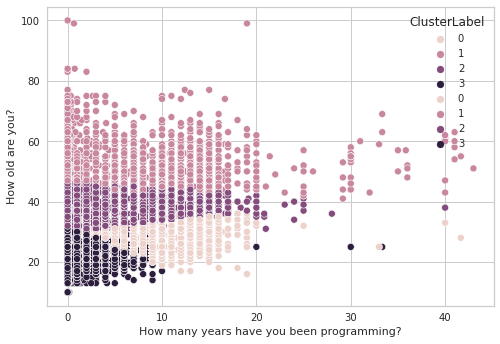

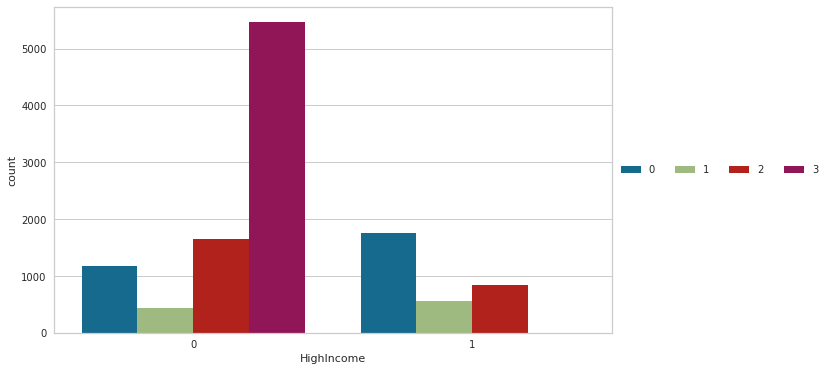

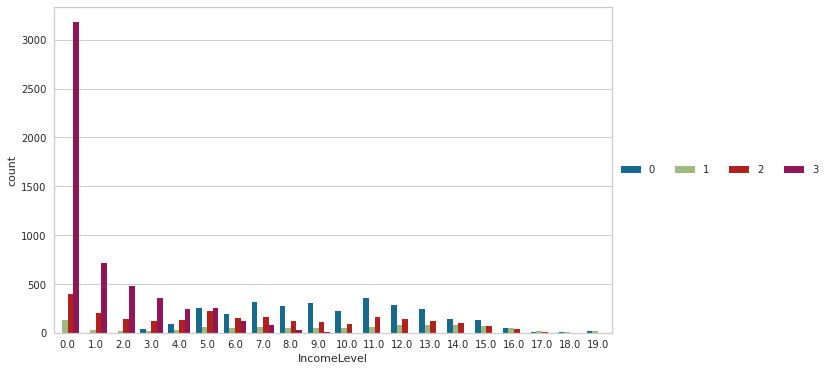

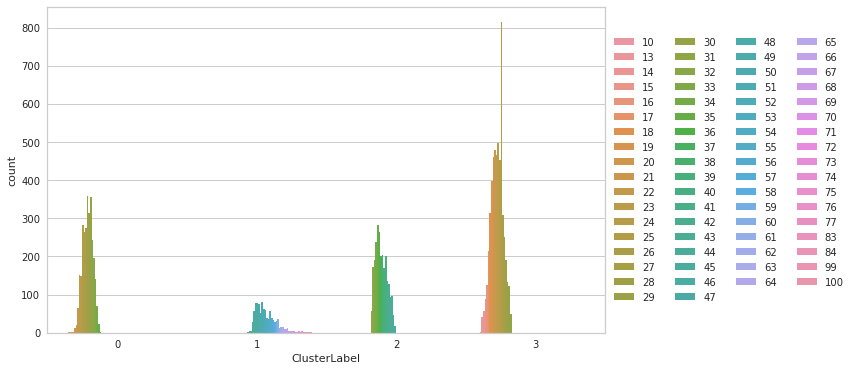

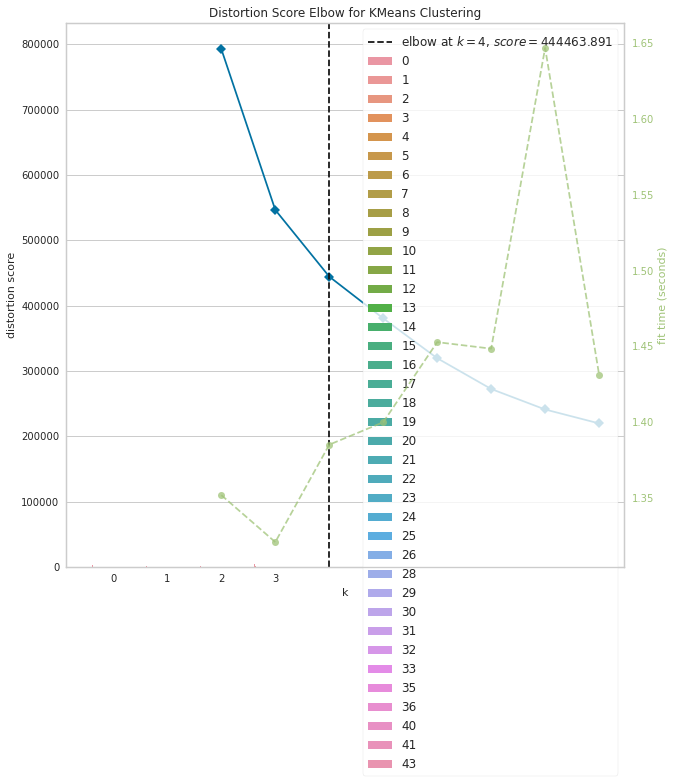

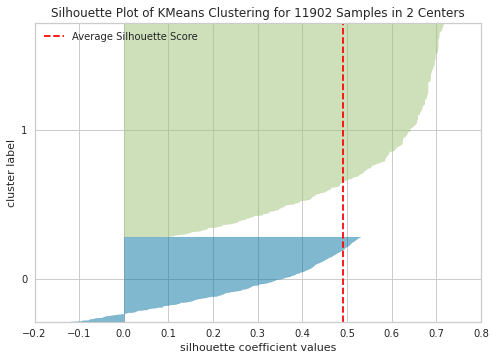

0.49067859674849085


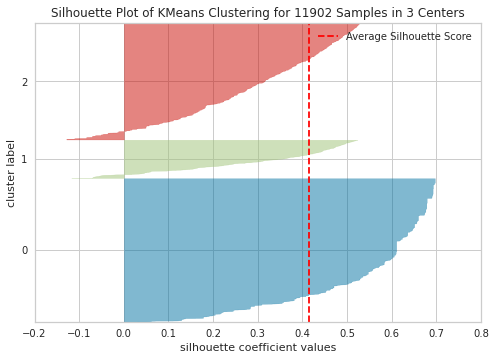

0.4145850151825964


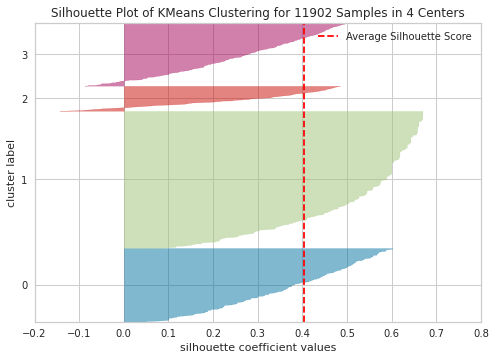

0.4046286660285132


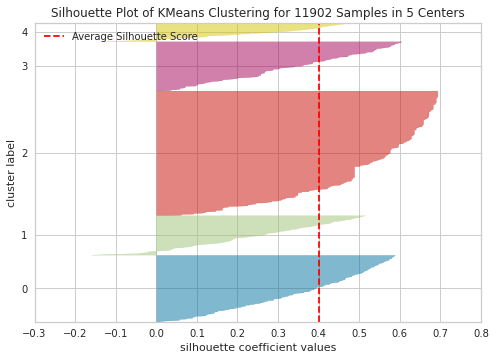

0.40096538361825307


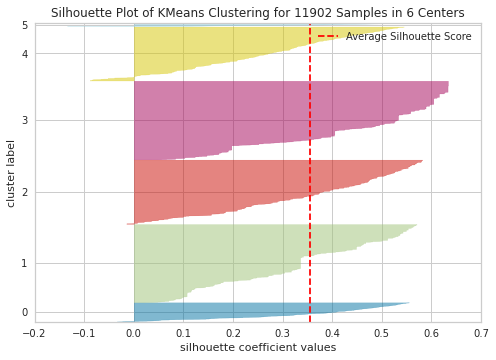

0.35590873871265316


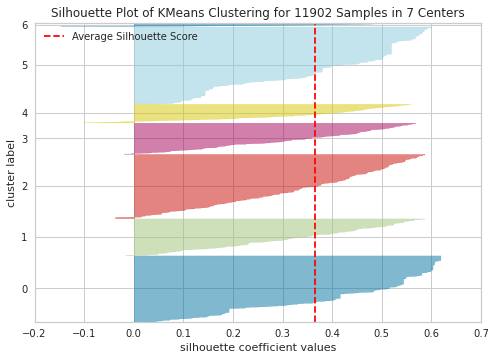

0.3656378985904209


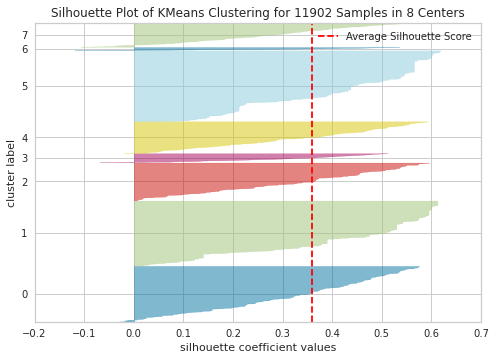

0.3587932964609733


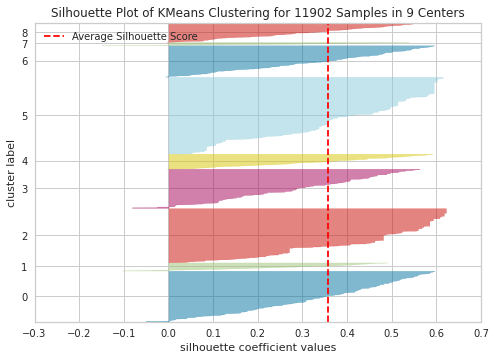

0.35643864788544943


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


newCoderSurvey = pd.read_csv("../input/2021-freecodecamp-new-coder-survey/2021 New Coder Survey.csv")

df_survey = pd.DataFrame(columns=['How many months have you been programming?', 'Are you already employed as a developer, is this your first software development job?', 'Highest degree or level of school you have completed?', 'Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?', 'Are you willing to relocate for a job?', 'How old are you?', 'How many people live in your city?', 'Income'])

df_survey['How many months have you been programming?'] = newCoderSurvey.iloc[:, 8]
df_survey['Are you already employed as a developer, is this your first software development job?'] = newCoderSurvey.iloc[:, 11]
df_survey['Highest degree or level of school you have completed?'] = newCoderSurvey.iloc[:, 32]
df_survey['Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?'] = newCoderSurvey.iloc[:, 34]
df_survey['Are you willing to relocate for a job?'] = newCoderSurvey.iloc[:, 19]
df_survey['How old are you?'] = newCoderSurvey.iloc[:, 23]
df_survey['How many people live in your city?'] = newCoderSurvey.iloc[:, 28]
df_survey['Income'] = newCoderSurvey.iloc[:, 22]

df_survey.dtypes

df_survey.isnull().sum()

df_survey.duplicated().sum()

df_survey = df_survey.drop_duplicates()

df_survey.duplicated().sum()

def convert_months_to_years(df_survey):
    df_copy = df_survey.copy()
    df_copy['How many years have you been programming?'] = df_copy['How many months have you been programming?'] / 12
    df_survey = df_copy.drop(columns=['How many months have you been programming?'])
    return df_survey

#Column 1
df_survey['How many months have you been programming?'].fillna(df_survey['How many months have you been programming?'].median(),inplace = True)

df_survey = df_survey[df_survey["How many months have you been programming?"] != "99999999999999999999999999999999999999999"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "+24"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "+40"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "+5"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "1200"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "4800"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "5000"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "1500"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "1973"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "9000"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != "1000"]
df_survey = df_survey[df_survey["How many months have you been programming?"] != 2400]

df_survey['How many months have you been programming?'] = df_survey['How many months have you been programming?'].replace(['000'],['0'])

df_survey['How many months have you been programming?'] = df_survey['How many months have you been programming?'].astype(float)

df_survey['How many months have you been programming?'] = df_survey['How many months have you been programming?'].astype(int)

df_survey = convert_months_to_years(df_survey)

#Column 2
df_survey['Are you already employed as a developer, is this your first software development job?'].fillna(df_survey['Are you already employed as a developer, is this your first software development job?'].mode()[0],inplace = True)

#Column 3
df_survey['Highest degree or level of school you have completed?'] = df_survey['Highest degree or level of school you have completed?'].replace(['Some college credit, no degree','Some high school','No high school (secondary school)'],['High school diploma or equivalent (GED)','Secondary school','Secondary school'])
df_survey['Highest degree or level of school you have completed?'] = df_survey['Highest degree or level of school you have completed?'].replace(["Professional degree (MBA, MD, JD, etc.)", "Master's degree (non-professional)", "High school diploma or equivalent (GED)", "Trade, technical, or vocational training"],['Professional Degree', 'Master Degree', 'High school diploma', 'Trade/Technical/Vocational'])
df_survey['Highest degree or level of school you have completed?'].fillna(df_survey['Highest degree or level of school you have completed?'].mode()[0],inplace = True)

#Column 4
df_survey['Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?'].fillna(df_survey['Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?'].mode()[0],inplace = True)

#Column 5
df_survey['Are you willing to relocate for a job?'] = df_survey['Are you willing to relocate for a job?'].replace(['I am not interested in a software development career'],['No'])

df_survey['Are you willing to relocate for a job?'].fillna(df_survey['Are you willing to relocate for a job?'].mode()[0],inplace = True)

#Column 6

df_survey['How old are you?'].fillna(df_survey['How old are you?'].median(),inplace = True)

df_survey['How old are you?'] = df_survey['How old are you?'].astype(int)

#Column 7

df_survey['How many people live in your city?'].fillna(df_survey['How many people live in your city?'].mode()[0],inplace = True)

#Column 8
df_survey = df_survey[df_survey["Income"] != 'I don’t know']
df_survey = df_survey[df_survey["Income"] != "I don't want to answer"]
df_survey = df_survey[df_survey["Income"] != 'None']

df_survey['Income'].fillna(df_survey['Income'].mode()[0],inplace = True)

from sklearn.preprocessing import OrdinalEncoder
income_level_order = [['Under $1,000', '$1,000 to $2,999', '$3,000 to $4,999', '$5,000 to $6,999', '$7,000 to $9,999', '$10,000 to $14,999', '$15,000 to $19,999','$20,000 to $24,999','$25,000 to $29,999','$30,000 to $34,999', '$35,000 to $39,999','$40,000 to $49,999','$50,000 to $59,999','$60,000 to $74,999','$75,000 to $89,999','$90,000 to $119,999','$120,000 to $159,999','$160,000 to $199,999', '$200,000 to $249,999','$250,000 or over',]] 
from sklearn.preprocessing import OrdinalEncoder
Incomeencoder = OrdinalEncoder(categories = income_level_order)  
df_survey['IncomeLevel'] = Incomeencoder.fit_transform(df_survey[['Income']])

df_survey.isnull().sum()

df_survey['HighIncome'] = df_survey['IncomeLevel'].apply(lambda x:0 if x < 9 else 1)

df_survey['How old are you?'].plot(kind='box')

z_scores = (df_survey - df_survey.mean()) / df_survey.std()
df_survey = df_survey[np.abs(z_scores['How old are you?']) < 9]
df_survey = df_survey[df_survey['How old are you?'] != 12]
df_survey = df_survey[df_survey['How old are you?'] != 11]
df_survey = df_survey[df_survey['How old are you?'] != 9]
df_survey = df_survey[df_survey['How old are you?'] != 8]
df_survey = df_survey[df_survey['How old are you?'] != 7]

bins = [0, 18, 25, 35, 50, 90]
labels = ['0-18', '19-25', '26-35', '36-50', '90-100']

df_survey['age_category'] = pd.cut(df_survey['How old are you?'], bins=bins, labels=labels)

data = pd.DataFrame(df_survey['How many years have you been programming?'])
graph = data.plot(kind='box')
graph.set_ylabel('Value')
plt.show()

data = pd.DataFrame(df_survey['Are you already employed as a developer, is this your first software development job?'])
value_counts = data['Are you already employed as a developer, is this your first software development job?'].value_counts()

graph = value_counts.plot(kind='pie', autopct='%1.1f%%')
graph.legend(value_counts.index.map(str))
graph.set_ylabel('')
plt.show()

df_survey['Are you already employed as a developer, is this your first software development job?'].describe()

data = pd.DataFrame(df_survey['Highest degree or level of school you have completed?'])
value_counts = data['Highest degree or level of school you have completed?'].value_counts()

graph = value_counts.plot(kind='barh')
graph.set_xlabel('Count')
graph.set_ylabel('Category')

plt.show()

data = pd.DataFrame(df_survey['Highest degree or level of school you have completed?'])
value_counts = data['Highest degree or level of school you have completed?'].value_counts()
graph = value_counts.plot(kind='pie', autopct='%1.1f%%')
graph.set_ylabel('')
plt.show()

data = pd.DataFrame(df_survey['Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?'])
value_counts = data['Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?'].value_counts()#

graph = value_counts.plot(kind='pie', autopct='%1.1f%%')
graph.legend(value_counts.index.map(str))
graph.set_ylabel('Currently attending an educational institution')
plt.show()

plt.figure(figsize=(20, 11))
ax = sns.countplot(data=df_survey, x='age_category', hue="Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)

plt.figure(figsize=(20, 11))
ax = sns.barplot(data=df_survey, x='age_category', y="IncomeLevel", hue="Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?", ci=None, estimator=max)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)

data = pd.DataFrame(df_survey['Are you willing to relocate for a job?'])
value_counts = data['Are you willing to relocate for a job?'].value_counts()

graph = value_counts.plot(kind='barh')
graph.set_xlabel('Count')
graph.set_ylabel('Are you willing to relocate for a job?')

plt.show()

data = pd.DataFrame(df_survey['Are you willing to relocate for a job?'])
value_counts = data['Are you willing to relocate for a job?'].value_counts()

graph = value_counts.plot(kind='pie', autopct='%1.1f%%')
graph.legend(value_counts.index.map(str))
graph.set_ylabel('Are you willing to relocate for a job?')
plt.show()

data = pd.DataFrame(df_survey['How old are you?'])
data.plot(kind='box')

data = pd.DataFrame(df_survey['How many people live in your city?'])
value_counts = data['How many people live in your city?'].value_counts()

graph = value_counts.plot(kind='barh')
graph.set_xlabel('Count')
graph.set_ylabel('Category')

plt.show()

data = pd.DataFrame(df_survey['How many people live in your city?'])
value_counts = data['How many people live in your city?'].value_counts()

graph = value_counts.plot(kind='pie', autopct='%1.1f%%')
graph.set_ylabel('')
plt.show()

sns.countplot(y=df_survey['Income'], data=df_survey)
plt.xlabel("count")
plt.ylabel("income")
plt.show()

plt.figure(figsize=(20, 11))
ax = sns.barplot(data=df_survey, x='age_category', y='How many years have you been programming?', ci=None, estimator=max)

plt.figure(figsize=(20, 11))
sns.barplot(x='Highest degree or level of school you have completed?', y='How many years have you been programming?', hue="IncomeLevel",  data=df_survey, ci=None, estimator=max)
plt.xlabel("Degree")
plt.ylabel("Years programming")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
plt.show()

data = {'Are you already employed as a developer, is this your first software development job?': df_survey['Are you already employed as a developer, is this your first software development job?'],
    'How old are you?': df_survey['How old are you?'],
       'IncomeLevel': df_survey['IncomeLevel']}

df = pd.DataFrame(data)

sns.catplot(x='How old are you?', y='Are you already employed as a developer, is this your first software development job?', hue="IncomeLevel", kind='bar', data=df, height=6, aspect=1.5, ci=None, estimator=max)

plt.xlabel("Age")
plt.ylabel("Employed as a developer, First developer job?")
plt.show()

myOrdinalEncoder = {"No":0 , "Yes":1}

cluster_data = df_survey
cluster_data["Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?"] = cluster_data["Are you currently a student attending or enrolled in regular school, that is in an elementary school, a middle school, a high school, a college, or a graduate school?"].replace(myOrdinalEncoder)

cluster_data = pd.get_dummies(cluster_data,columns = ['Highest degree or level of school you have completed?', 'Are you already employed as a developer, is this your first software development job?', 'Are you willing to relocate for a job?', 'How many people live in your city?']).groupby(cluster_data.index, as_index=False).max()

del cluster_data['age_category']
del cluster_data['Income']

KMeans_cluster1 = cluster_data[['How old are you?','How many years have you been programming?', 'IncomeLevel', 'HighIncome']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,init='random', 
            n_init=10,  
            tol=1e-04,
            random_state=0)
y_cluster = km.fit_predict(cluster_data)
KMeans_cluster1['ClusterLabel'] = y_cluster

sns.scatterplot(data=KMeans_cluster1,y="How old are you?", x="How many years have you been programming?", hue="ClusterLabel")

sns.scatterplot(data=KMeans_cluster1,y="How old are you?", x="IncomeLevel", hue="ClusterLabel")

plt.figure(figsize=(10, 6))
sns.countplot(data=KMeans_cluster1, x="HighIncome", hue="ClusterLabel")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)

plt.figure(figsize=(10, 6))
sns.countplot(data=KMeans_cluster1, x="IncomeLevel", hue="ClusterLabel")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=KMeans_cluster1, x="ClusterLabel" ,hue='How old are you?')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)

plt.figure(figsize=(10, 10))
KMeans_cluster1['How many years have you been programming?'] = KMeans_cluster1['How many years have you been programming?'].astype(int)
ax = sns.countplot(data=KMeans_cluster1, x="ClusterLabel" ,hue='How many years have you been programming?',)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
KElbowVisualisermodel = KMeans()
KElbowVisualiser = KElbowVisualizer(KElbowVisualisermodel, k=(2,10))
KElbowVisualiser.fit(KMeans_cluster1)
KElbowVisualiser.show()

from yellowbrick.cluster import SilhouetteVisualizer 

for kvalue in range(2,10):
    Skm =  KMeans(kvalue, random_state=1,tol=1e-04,)
    Svisualizer = SilhouetteVisualizer(Skm, colors='yellowbrick')

    Svisualizer.fit(KMeans_cluster1)
    Svisualizer.show()
    print(Svisualizer.silhouette_score_)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics

cluster_data = cluster_data[[i for i in cluster_data if i not in ['HighIncome']] + ['HighIncome']]
X = cluster_data.iloc[:,0:21]
y = cluster_data.iloc[:,21]

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=4)

X_train_new, X_val, y_train_new, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=4)

Stand_scaler = StandardScaler()
X_train = Stand_scaler.fit_transform(X_train)
X_test = Stand_scaler.transform(X_test)

0.9493139176701204
KNN MODEL NO TUNNING


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


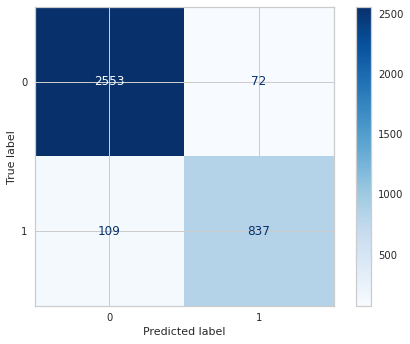

In [22]:
knnModel = KNeighborsClassifier()
knnModel.fit(X_train, y_train)
yprediction = knnModel.predict(X_test)
print(metrics.accuracy_score(y_test, yprediction))

from sklearn.metrics import plot_confusion_matrix
print("KNN MODEL NO TUNNING")
plot_confusion_matrix(knnModel, X_test, y_test,cmap=plt.cm.Blues)

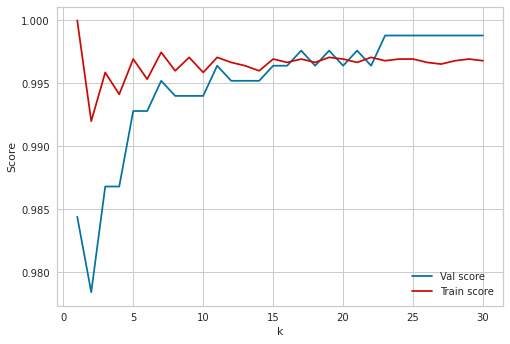

In [23]:
validation_results_array = []
training_results_array = []

KNN_range = range(1, 31) 


for kValues in KNN_range:
    knnModel = KNeighborsClassifier(n_neighbors=kValues)
    knnModel = knnModel.fit(X_train_new, y_train_new)
    predictionTrainingNew = knnModel.predict(X_train_new)
    t_score = metrics.accuracy_score(y_train_new, predictionTrainingNew) 
    training_results_array.append(t_score)
    predictionvalue = knnModel.predict(X_val) 
    v_score = metrics.accuracy_score(y_val, predictionvalue) 
    validation_results_array.append(v_score) 


plt.plot(k_range, validation_results_array, 'b-', label='Val score')
plt.plot(k_range, training_results_array, 'r-', label='Train score') 
plt.ylabel('Score')
plt.xlabel('k')
plt.legend()
plt.grid(True)
plt.show()

0.930551666199944
KNN MODEL HOLD OUT


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


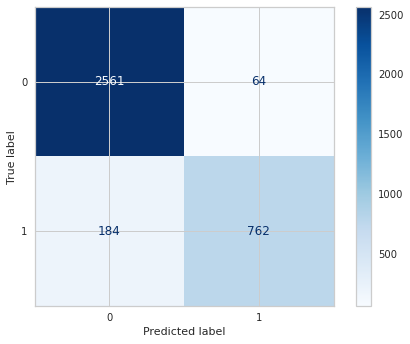

In [24]:
knnModel = KNeighborsClassifier(n_neighbors=17)
knnModel = knnModel.fit(X_train, y_train)
yprediction = knnModel.predict(X_test)
print(metrics.accuracy_score(y_test, yprediction))

from sklearn.metrics import plot_confusion_matrix
print("KNN MODEL HOLD OUT")
plot_confusion_matrix(knnModel, X_test, y_test,cmap=plt.cm.Blues)

0.9493139176701204
KNN MODEL GRIDSEARCH


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


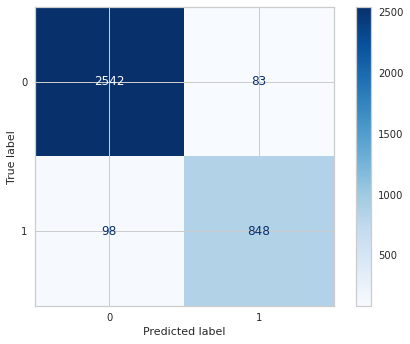

In [36]:
from sklearn.model_selection import GridSearchCV
knnModel = KNeighborsClassifier() 
parameterGrid = [{'weights':['uniform'], 'n_neighbors':list(range(1,30))},
               {'weights':['distance'], 'n_neighbors':list(range(1,30))}]

Stand_scaler = StandardScaler()
X_train = Stand_scaler.fit_transform(X_train)
X_test = Stand_scaler.transform(X_test)

gridSearchAlog = GridSearchCV(knnModel, parameterGrid, scoring='accuracy', cv=10)                          

gridSearchAlog = gridSearchAlog.fit(X_train,y_train)

knnGridSearch = gridSearchAlog.best_estimator_

knnGridSearch.fit(X_train, y_train)

yprediction = knnGridSearch.predict(X_test)
print(metrics.accuracy_score(y_test, yprediction))

from sklearn.metrics import plot_confusion_matrix
print("KNN MODEL GRIDSEARCH")
plot_confusion_matrix(knnGridSearch, X_test, y_test,cmap=plt.cm.Blues)

Accuracy: 1.0
LR MODEL NO TUNNING


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


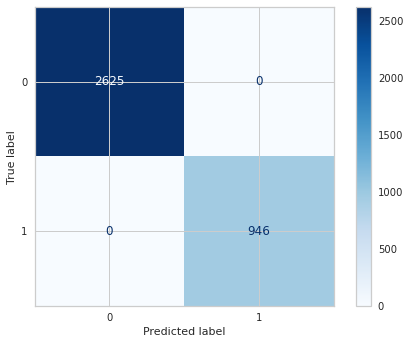

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

MinMax_scaler = MinMaxScaler()
X_train = MinMax_scaler.fit_transform(X_train)
X_test = MinMax_scaler.transform(X_test)

lrModel = LogisticRegression()
lrModel = lrModel.fit(X_train,y_train)
yprediction = lrModel.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, yprediction))

from sklearn.metrics import plot_confusion_matrix
print("LR MODEL NO TUNNING")
plot_confusion_matrix(lrModel, X_test, y_test,cmap=plt.cm.Blues)

{'penalty': 'l2'}
0.9995200959808038
LR MODEL GRIDSEARCH


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


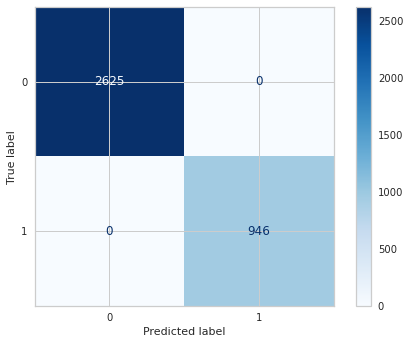

In [27]:
from sklearn.model_selection import GridSearchCV

lrModel = LogisticRegression()
parameterGrid = {'penalty': ["l2"]}

gridSearchAlog = GridSearchCV(lrModel, parameterGrid, cv=5)                          
gridSearchAlog = gridSearchAlog.fit(X_train,y_train)

print(gridSearchAlog.best_params_)
print(gridSearchAlog.best_score_)

from sklearn.metrics import plot_confusion_matrix
print("LR MODEL GRIDSEARCH")
plot_confusion_matrix(gridSearchAlog, X_test, y_test,cmap=plt.cm.Blues)


1.0
DT MODEL NO TUNNING


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


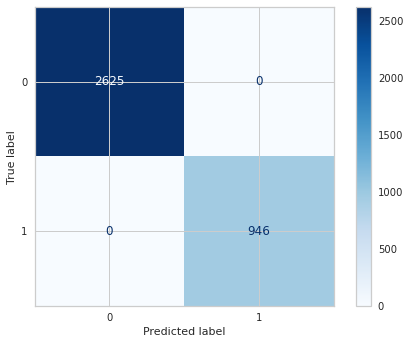

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtModel = DecisionTreeClassifier()
dtModel.fit(X_train, y_train)
yprediction = dtModel.predict(X_test)
print(metrics.accuracy_score(y_test, yprediction))
print("DT MODEL NO TUNNING")
plot_confusion_matrix(dtModel, X_test, y_test,cmap=plt.cm.Blues)


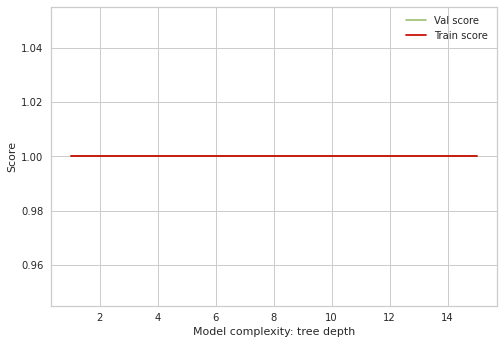

In [29]:
max_depth_range = range(1, 16)

validation_results_array = []
training_results_array = []

for k in max_depth_range:
    dtModel = DecisionTreeClassifier(max_depth=k)
    dtModel = dtModel.fit(X_train_new, y_train_new)
    predictionTrainingNew = dtModel.predict(X_train_new)
    t_score = metrics.accuracy_score(y_train_new, predictionTrainingNew) 
    training_results_array.append(t_score)
    predictionvalue = dtModel.predict(X_val) 
    v_score = metrics.accuracy_score(y_val, predictionvalue) 
    validation_results_array.append(v_score)
    
    
plt.plot(max_depth_range, validation_results_array, 'g-', label='Val score')
plt.plot(max_depth_range, training_results_array, 'r-', label='Train score')
plt.ylabel('Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()
plt.grid(True)
plt.show()

1.0
DT MODEL HOLD OUT


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


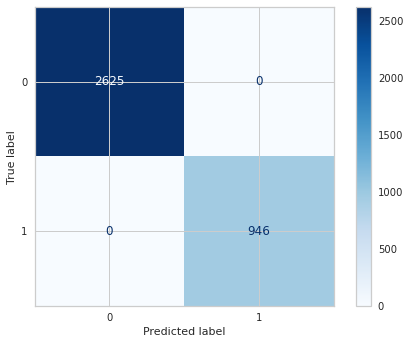

In [30]:
dtModel = DecisionTreeClassifier(max_depth=2)
dtModel = dtModel.fit(X_train, y_train)
yprediction = dtModel.predict(X_test)
print(metrics.accuracy_score(y_test, yprediction))


from sklearn.metrics import plot_confusion_matrix
print("DT MODEL HOLD OUT")
plot_confusion_matrix(dtModel, X_test, y_test,cmap=plt.cm.Blues)

1.0
DT MODEL GRIDSEARCH


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


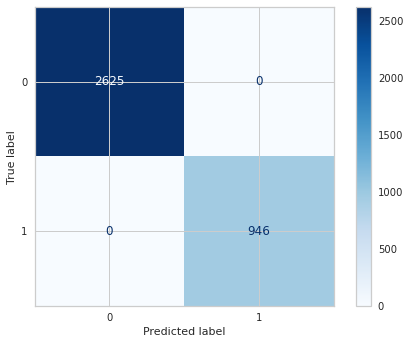

In [31]:
from sklearn.model_selection import GridSearchCV

dtModel = DecisionTreeClassifier() 
parameterGrid = [{'criterion':['gini'], 'max_depth':list(range(1,16))},
               {'criterion':['entropy'], 'max_depth':list(range(1,16))}]

gridSearchAlog = GridSearchCV(dtModel, parameterGrid, scoring='accuracy', cv=10)                          

gridSearchAlog = gridSearchAlog.fit(X_train,y_train)
 
dtGridSearch = gridSearchAlog.best_estimator_

dtGridSearch = dtGridSearch.fit(X_train, y_train)

yprediction = dtGridSearch.predict(X_test)
print(metrics.accuracy_score(y_test, yprediction))

from sklearn.metrics import plot_confusion_matrix
print("DT MODEL GRIDSEARCH")
plot_confusion_matrix(dtGridSearch, X_test, y_test,cmap=plt.cm.Blues)

In [34]:
from sklearn.linear_model import LogisticRegression   
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

Stand_scaler = StandardScaler()
X_train = Stand_scaler.fit_transform(X_train)
X_test = Stand_scaler.transform(X_test)

dtModel = DecisionTreeClassifier()
knnModel = KNeighborsClassifier()
lrModel= LogisticRegression(max_iter=10000)
model_ensemble = VotingClassifier(estimators=[('dt', dtModel), ('knn', knnModel), ('lr', lrModel)], voting='hard')

from sklearn.metrics import accuracy_score

dtModel = dtModel.fit(X_train, y_train)
y_train_pred = dtModel.predict(X_train)
y_test_pred = dtModel.predict(X_test) 
t_score = accuracy_score(y_train, y_train_pred)
testing_score = accuracy_score(y_test, y_test_pred)
print('dtModel = train/test accuracies %.3f/%.3f' % (t_score, testing_score))

knnModel = knnModel.fit(X_train, y_train)
y_train_pred = knnModel.predict(X_train)
y_test_pred = knnModel.predict(X_test) 
t_score = accuracy_score(y_train, y_train_pred)
testing_score = accuracy_score(y_test, y_test_pred)
print('knnModel = train/test accuracies %.3f/%.3f' % (t_score, testing_score))

lrModel = lrModel.fit(X_train, y_train)
y_train_pred = lrModel.predict(X_train)
y_test_pred = lrModel.predict(X_test) 
t_score = accuracy_score(y_train, y_train_pred)
testing_score = accuracy_score(y_test, y_test_pred)
print('lrModel = train/test accuracies %.3f/%.3f' % (t_score, testing_score))

model_ensemble = model_ensemble.fit(X_train, y_train)

y_train_pred = model_ensemble.predict(X_train)
y_test_pred = model_ensemble.predict(X_test) 
t_score = accuracy_score(y_train, y_train_pred)
testing_score = accuracy_score(y_test, y_test_pred)
print('Best model = train/test accuracies %.3f/%.3f' % (t_score, testing_score))

dtModel = train/test accuracies 1.000/1.000
knnModel = train/test accuracies 0.973/0.950
lrModel = train/test accuracies 1.000/1.000
Best model = train/test accuracies 1.000/1.000
